# KNN, SVM(linear, rbf), Decision tree or random forest algorithm

## Sommaire
## 1) Introduction
## 2) Description des données
## 3) Materials
## 4) Conclusion

## 1) INTRODUCTION

###### Le machine learning devient la priorité de bon nombre d’entreprises. Elles veulent modéliser d’importants volumes de données. Le choix du bon algorithme dépend des objectifs à atteindre et de la maturité de votre équipe de Data Science.
###### Pour certains, l’affirmation suivante apparaît comme une évidence : un seul algorithme  ne pas répondre à toutes les problématiques. Suivant le type de données et les objectifs de votre organisation, certains modèles seront plus adaptés.

###### Dans cet article on parlera des différentes algorithmes de classification et on prendera iris comme dataset afin de les comparer 

In [2]:
# Importation des bibliothèques nécessaires
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from itertools import cycle
from sklearn import linear_model, svm
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn import neighbors
import pandas as pd
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np

In [7]:
#Notre dataset
irisData = datasets.load_iris()

In [8]:
x = irisData.data

In [9]:
y=irisData.target

In [10]:
irisData.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [11]:
#description du jeu de données
irisData.DESCR

'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ============== ==== =

In [12]:
df=pd.DataFrame(irisData.data,columns=irisData.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [13]:
df["target"]=pd.DataFrame(irisData.target)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B5781ABF70>,
      dtype=object)

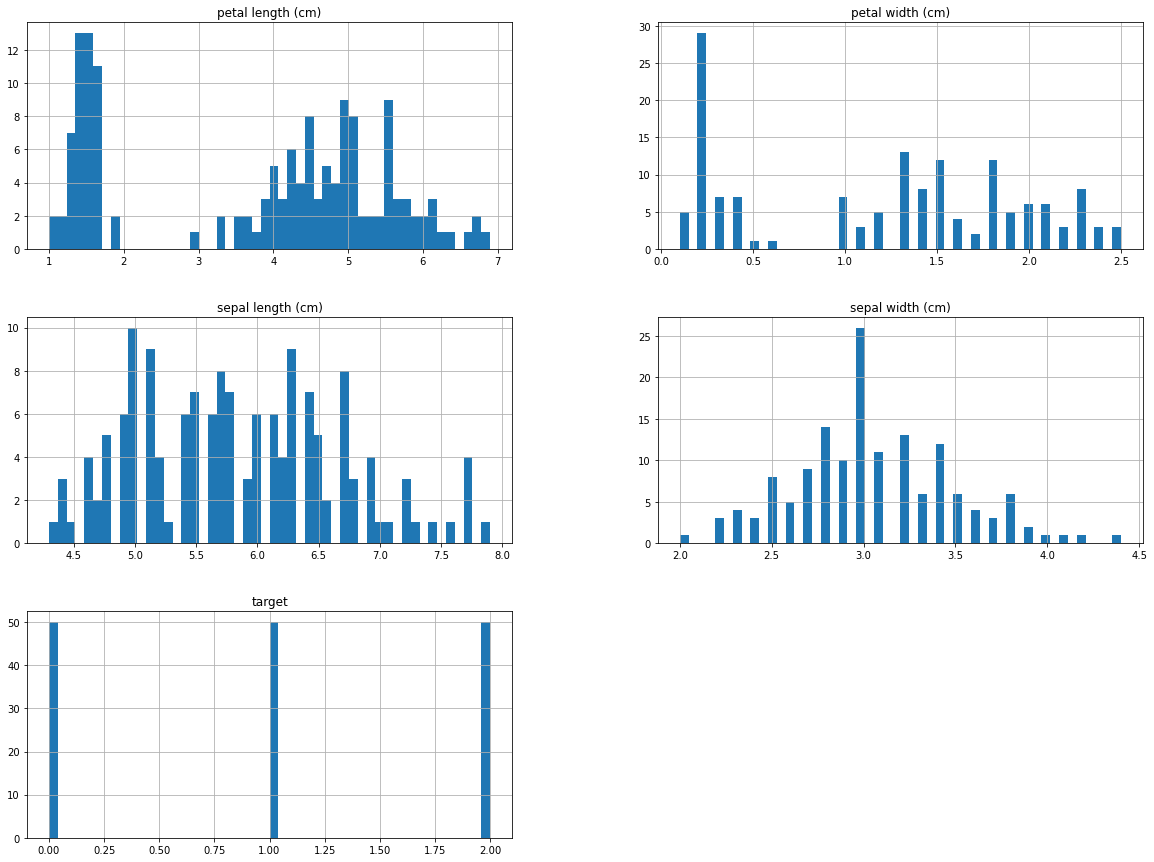

In [14]:
df.hist(bins=50, figsize=(20,15))

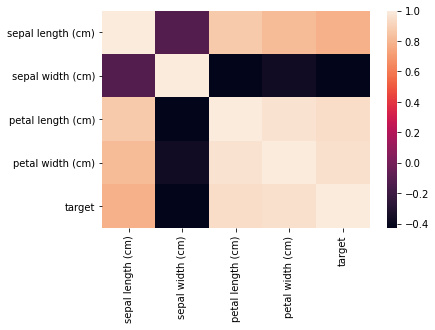

In [15]:
# looking for correlation
import seaborn as sns
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

## 2) Description du Dataset

###### L'ensemble de données sur l'iris contient quatre caractéristiques (longueur et largeur des sépales et des pétales) de 50 échantillons de trois espèces d'iris (Iris setosa, Iris virginica et Iris versicolor). Ces mesures ont été utilisées pour créer un modèle discriminant linéaire pour classer les espèces. L'ensemble de données est souvent utilisé dans des exemples d'exploration de données, de classification et de clustering et pour tester des algorithmes.

In [18]:
# spliting data
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7)

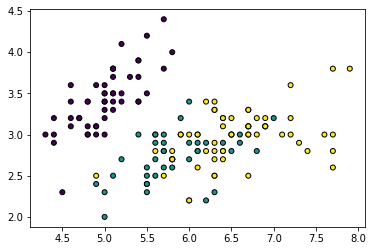

In [19]:
plt.scatter(x[:,0],x[:,1],marker="o", c=y, s=25, edgecolor="k")

## 3) Matérials

### 3) -1 Le model KNN

###### Un algorithme k-nearest-neighbor, souvent abrégé k-nn, est une approche de la classification des données qui estime la probabilité qu'un point de données soit membre d'un groupe ou de l'autre en fonction du groupe auquel les données les points les plus proches sont dedans.

###### Le k-nearest-neighbor est un exemple d'algorithme "d'apprenant paresseux", ce qui signifie qu'il ne construit pas de modèle à l'aide de l'ensemble d'apprentissage tant qu'une requête de l'ensemble de données n'est pas effectuée.

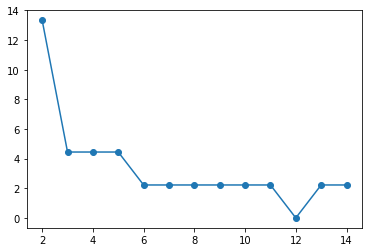

In [20]:
# looking for best K
errors = []
for k in range(2,15):
    
    knn = neighbors.KNeighborsClassifier(k)
    errors.append(100*(1 - knn.fit(x_train, y_train).score(x_test, y_test)))
    
plt.plot(range(2,15), errors, 'o-')
plt.show()

In [21]:
# calculer l'erreur
knn.score(x_test,y_test)

0.9777777777777777

In [22]:
accuracies = cross_val_score(estimator = knn, X = x_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 93.36 %
Standard Deviation: 8.28 %


In [23]:
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])


X = irisData.data[:, :2]  # we only take the first two features. We could

y = irisData.target

knn = neighbors.KNeighborsClassifier(n_neighbors=13)
knn.fit(X, y)

x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                        np.linspace(y_min, y_max, 100))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

(4.2, 8.0, 1.9, 4.5)

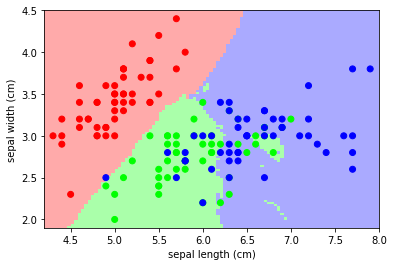

In [24]:
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.axis('tight')

### 3)-2 Le Model SVM

###### Les machines à vecteurs de support ou SVM (Séparateurs à vastes marges) sont des algorithmes qui séparent les données en classes. Pendant l’entraînement, un SVM trouve une ligne qui sépare les données d’un jeu en classes spécifiques et maximise les marges (les distances entre les frontières de séparation et les échantillons les plus proches) de chaque classe. Après avoir appris les lignes de classification, le modèle peut ensuite les appliquer aux nouvelles données.

###### Les spécialistes placent le SVM dans la catégorie des « classificateurs linéaires » : l’algorithme est idéal pour identifier des classes simples qu’il sépare par des vecteurs nommés hyperplans. Il est également possible de programmer l’algorithme pour les données non linéaires, que l’on ne peut pas séparer clairement par des vecteurs. Mais, avec des données d’entraînement hypercomplexes – visages, traits de personnalité, génomes et matériel génétique – les systèmes de classes deviennent plus petits et plus difficiles à identifier et nécessitent un peu plus d’assistance humaine.

In [25]:
# avec kernel = linear
classifier = SVC (kernel = 'linear', random_state = 0)
classifier.fit(x_train,y_train)

SVC(kernel='linear', random_state=0)

In [26]:
y_pred = classifier.predict(x_test)

In [27]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[13,  0,  0],
       [ 0, 18,  1],
       [ 0,  0, 13]], dtype=int64)

Text(42.0, 0.5, 'Truth')

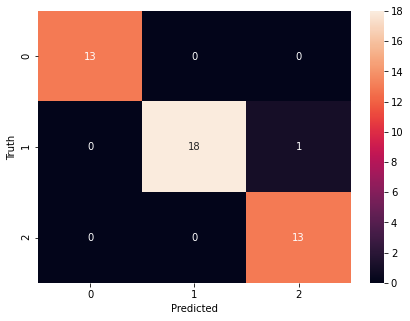

In [28]:
# plotting confusion matrix
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [29]:
classifier.score(x_test,y_test)

0.9777777777777777

In [30]:
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 98.00 %
Standard Deviation: 4.00 %


In [31]:
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])


X = irisData.data[:, :2]  # we only take the first two features. 
y = irisData.target


classifier.fit(X, y)

x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                        np.linspace(y_min, y_max, 100))
Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])

(4.2, 8.0, 1.9, 4.5)

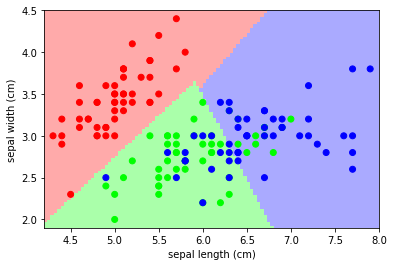

In [32]:
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.axis('tight')

In [33]:
classifier = SVC (kernel = 'rbf', random_state = 0)
classifier.fit(x_train,y_train)

SVC(random_state=0)

In [34]:
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])


X = irisData.data[:, :2]  # we only take the first two features. We could
                    # avoid this ugly slicing by using a two-dim dataset
y = irisData.target


classifier.fit(X, y)

x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                        np.linspace(y_min, y_max, 100))
Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])

(4.2, 8.0, 1.9, 4.5)

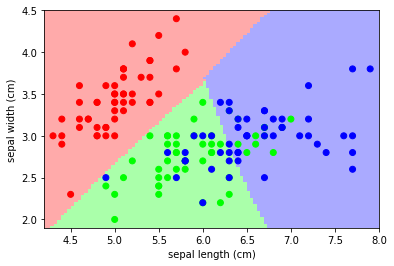

In [35]:
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.axis('tight')

### 3)-3 Arbre de décision

###### Un algorithme d’arbre de décision représente graphiquement les données en branches pour montrer les résultats possibles de diverses actions. Il classifie et prédit les variables de réponse en fonction des décisions passées.

###### Cette méthode visuelle a fait ses preuves. Les résultats des arbres de décision sont faciles à expliquer. Les citizen data scientists n’auront aucun mal à les interpréter. Les décisions et leurs impacts probables sur un résultat final sont aisément visibles, même lorsque les jeux de données en entrée s’avèrent incomplets.

###### Cependant, les arbres de décisions deviennent difficiles à lire quand ils sont associés à de gros volumes de données et à des variables complexes. C’est pourquoi ils sont utilisés pour les décisions à faibles enjeux, comme l’anticipation des variations de taux d’emprunt ou les réactions du marché si une entreprise modifie un élément important d’un de ses produits.



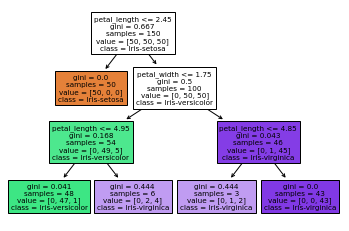

In [36]:
clf = DecisionTreeClassifier(max_depth=3)
#Entrainement de l'abre de décision 
clf.fit(x,y)
#Affichage de l'abre de décision obtenu après entraînement
plot_tree(clf, feature_names= ['sepal_length','sepal_width','petal_length','petal_width'], class_names=["Iris-setosa","Iris-versicolor","Iris-virginica"],filled=True)
plt.show()

In [37]:
min1, max1 = x[:, 0].min()-1, x[:, 0].max()+1
min2, max2 = x[:, 1].min()-1, x[:, 1].max()+1

In [38]:
x1grid = np.arange(min1, max1, 0.1)
x2grid= np.arange(min2, max2, 0.1)

In [39]:
xx, yy = np.meshgrid(x1grid, x2grid)
#meshgrid permet de créer une matrice rectangulaire 

In [40]:
r1, r2 = xx.flatten(), yy.flatten()
#flatten nous permet de rendre le grid unidimensionnel, càd de grid à vecteur
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

In [41]:
grid = np.hstack((r1,r2))

### Decision boundary de l'arbre de décision

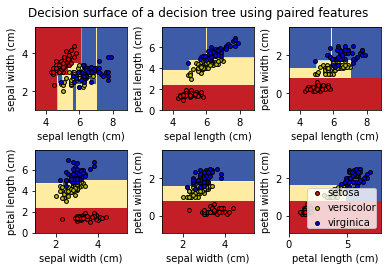

In [42]:
# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

# Load data

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = irisData.data[:, pair]
    y = irisData.target

    # Train
    clf = DecisionTreeClassifier(random_state=0).fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(irisData.feature_names[pair[0]])
    plt.ylabel(irisData.feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=irisData.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")
plt.show()

## 3)-4 Random forest algorithm

###### Les forêts aléatoires ou forêts de décision aléatoire sont une méthode d'apprentissage d'ensemble pour la classification, la régression et d'autres tâches qui fonctionnent en construisant une multitude d'arbres de décision au moment de la formation. 

###### Pour les tâches de classification, la sortie de la forêt aléatoire est la classe sélectionnée par la plupart des arbres. Pour les tâches de régression, la prédiction moyenne ou moyenne des arbres individuels est renvoyée. Les forêts de décision aléatoires corrigent l'habitude des arbres de décision de suradapter à leur ensemble d'apprentissage. Les forêts aléatoires surpassent généralement les arbres de décision, mais leur précision est inférieure à celle des arbres à gradient. Cependant, les caractéristiques des données peuvent affecter leurs performances.

In [43]:
# Random forrest algorithm
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(x_train,y_train) 
clf.score(x_test,y_test)

0.9333333333333333

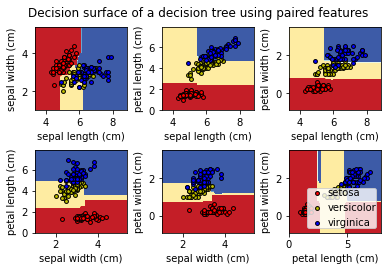

In [44]:
# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

# Load data

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = irisData.data[:, pair]
    y = irisData.target

    # Train
    clf = RandomForestClassifier(max_depth=2, random_state=0).fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(irisData.feature_names[pair[0]])
    plt.ylabel(irisData.feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=irisData.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")
plt.show()

In [47]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X2D_train = pca.fit_transform(x_train)
X2D_test = pca.fit_transform(x_test)

In [48]:
from sklearn import model_selection
seed = 7
scoring = 'accuracy'
models = []

models.append(('KNN', KNeighborsClassifier()))
models.append(('Tree', DecisionTreeClassifier()))
models.append(('randomforest',RandomForestClassifier()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
for name,model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, x_train, y_train , cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)       
        

C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


KNN: 0.932727 (0.074877)
Tree: 0.940909 (0.065839)
randomforest: 0.950909 (0.066457)
SVM: 0.933636 (0.084897)


C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


[Text(0, 0, 'KNN'),
 Text(0, 0, 'Tree'),
 Text(0, 0, 'randomforest'),
 Text(0, 0, 'SVM')]

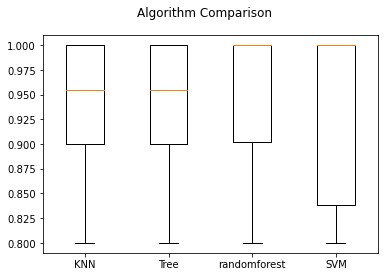

In [49]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)

###### Plusieurs algorithmes de régression et de classification binaire sont disponibles dans scikit-learn. Un moyen simple d'étendre ces algorithmes au cas de la classification multiclasse consiste à utiliser le schéma dit One vs all.

###### Au moment de l'apprentissage, cela consiste simplement à apprendre un régresseur ou classificateur binaire par classe. Ce faisant, il faut convertir les étiquettes multi-classes en étiquettes binaires (appartenant ou n'appartenant pas à la classe). LabelBinarizer facilite ce processus avec la méthode de transformation.

###### c'est ce qu'on va faire on va créer 3 classes qui representent les 3 types de species. si par exemple la plante est Iris-setosa alors la classe qui la represente contient 1 sinon 0.


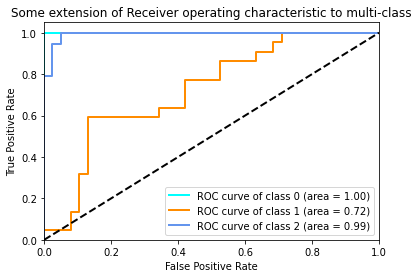

In [51]:
X = irisData.data
y = irisData.target
# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]
lw=2

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear'))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot all ROC curves
plt.figure()

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

## 4) Conclusion

###### Comme prévu, les 4 modèles se sont bien comportés et, étonnamment, partagent tous le même point mal classé. Tous les résultats numériques présentés ci-dessus dépendent de la division aléatoire des données en ensembles d'apprentissage et de test ainsi que d'autres initialisations aléatoires concernant l'arbre de décision et la séparation des ensembles d'apprentissage et de validation croisée. La modification des initialisations aléatoires ne devrait pas trop affecter les résultats, car il s'agit d'un ensemble de données propre et bien comporté.

###### Les étapes de base pour décider quel algorithme utiliser dépendront d'un certain nombre de facteurs. Quelques facteurs que l'on peut rechercher sont énumérés ci-dessous :

###### Nombre d'exemples dans l'ensemble d'apprentissage.

###### Dimensions de l'espace en vedette.

###### Avons-nous des caractéristiques corrélées ?

###### Le surapprentissage est-il un problème ?

###### Ce ne sont là que quelques facteurs dont le choix de l'algorithme peut dépendre. Une fois que vous avez les réponses à toutes ces questions, vous pouvez aller de l'avant pour décider de l'algorithme.


##### SVM

###### La principale raison d'utiliser une SVM à la place est que le problème peut ne pas être linéairement séparable. Dans ce cas, nous devrons utiliser une SVM avec un noyau non linéaire (par exemple RBF).

###### Une autre raison connexe d'utiliser des SVM est si vous êtes dans un espace hautement dimensionnel. Par exemple, il a été rapporté que les SVM fonctionnent mieux pour la classification de texte.

###### Mais cela demande beaucoup de temps pour s'entraîner. Donc, il n'est pas recommandé lorsque nous avons un grand nombre d'exemples de formation.

##### kNN

###### Il est robuste aux données d'apprentissage bruyantes et est efficace en cas de grand nombre d'exemples d'apprentissage.
###### Mais pour cet algorithme, il faut déterminer la valeur du paramètre K (nombre de plus proches voisins) et le type de distance à utiliser. Le temps de calcul est également très important car nous devons calculer la distance de chaque instance de requête à tous les échantillons d'apprentissage.

##### Random Forest

###### Random Forest n'est rien de plus qu'un tas d'arbres de décision combinés. Ils peuvent très bien gérer les caractéristiques catégorielles.

###### Cet algorithme peut gérer des espaces de grande dimension ainsi qu'un grand nombre d'exemples d'apprentissage.

###### Les forêts aléatoires peuvent presque fonctionner immédiatement et c'est l'une des raisons pour lesquelles elles sont très populaires.

###### Réalisé par : Mohamed HAFIDI